In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [9]:
img0 =  cv2.imread('me.png',0)
img01 = np.array(img0[:,:])

In [10]:
i01 =  cv2.imread('1.jpg',0)
i02 = cv2.imread('9.jpg',0)
i03 =  cv2.imread('7.jpg',0)
i04 = cv2.imread('8.jpg',0)

In [11]:
resi = (200,300)

In [12]:
img = cv2.resize(img0,resi)
img1 = cv2.resize(img01,resi)
i1 =  cv2.resize(i01,resi)
i2 = cv2.resize(i02,resi)
i3 =  cv2.resize(i03,resi)
i4 = cv2.resize(i04,resi)
i_main = [img,i1,i2,i3,i4]

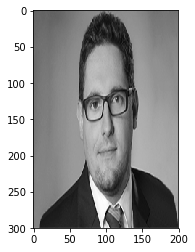

In [13]:
%matplotlib inline
plt.imshow(img,cmap='gray')

In [129]:
#Making Basis for Dictionary
size2 = 64
Basis_T = []
w = 4
for i in range(len(i_main)):
    i_temp = i_main[i]
    x,y = i_temp.shape
    B = [0]*64
    for j in range(40000):
        count = 0
        x_1 = random.randint(50,x-50)
        y_1  =random.randint(50,y-50)
        for k in range(-w,w):
            for l in range(-w,w):
                B[count] = i_temp[x_1 + l][y_1 + k]
                count += 1
        Basis_T.append(B/np.linalg.norm(B))
size5 = len(Basis_T)

In [489]:
B = []
for i in range(256):
    x = random.randint(0,size5-1)
    B.append(Basis_T[x])
Basis = np.array(np.transpose(B),ndmin = 2)

In [490]:
#Making Mask
img_masked = cv2.imread("meno.png",0)
img_mask = cv2.resize(img_masked,resi)
mask1 = img_mask
for i in range(len(mask1)):
    for j in range(len(mask1[0])):
        if mask1[i,j] <=253:
            mask1[i,j]=0
mask_open = cv2.morphologyEx(mask1,cv2.MORPH_CLOSE,np.ones((3,3),np.uint8))
height, width= mask1.shape

for i in range(0, height):
    for j in range(0, width):
        if mask1[i,j] != 0:
            mask1[i,j] = 255
thresh = mask1
count = 0
for i in range(0, height):
    for j in range(0, width):
        if mask1[i,j]!=0:
            count+=1

In [491]:
def destroy(inner2,Lambda):
    for i in range(len(inner2)):
        if Lambda[i]!= 0 :
            inner2[i] = 0
    return inner2

In [492]:
def boundary5(mask1):
    thresh = mask1
    contours_count = 0
    contours = None
    w = 4
    check = 0
    for i in range(100,len(thresh)-100):
        for j in range(25,len(thresh[0])-25):
            if thresh[i,j]!=0:
                x,y = i,j
                check = 1
                break
        if check == 1:
            break
    if check ==0 :
        return None
    contours = [x-3,y-3]
    return contours

In [493]:
def w_maker(a,w):
    w = np.identity(256)
    for i in range(256):
        w[i][i] = abs(a[i])**0.65
    return w

In [500]:
t = 0
x,y = [0,0]
while t!=1:
    t+=1
    contours= boundary5(mask1)
    if contours == None:
        break      
    
    w = 4
    patches_img = []
    patches_mask = []
    

    patch_img = []
    patch_mask = []
    x,y = contours
    for i in range(-w,w):
        for j in range(-w,w):
            patch_img.append(img1[x+j,y+i])
            patch_mask.append(mask1[x+j,y+i])
                     
    #patches_img_sub = []
    Basis_sub = []
    patch_img_sub = []
    basis_sub = []
    
    for k in range(64):
        if patch_mask[k] <=127:
            patch_img_sub.append(patch_img[k])
            basis_sub.append(Basis[k])
    Basis_sub = np.array(basis_sub)
    #print(Basis_sub.shape)
    a0_T = np.array([1]*256,ndmin = 2)
    a0 = a0_T.transpose()
    w0 = np.identity(256)
    
    x = np.array(patch_img_sub,ndmin = 2)
    x_T = x.transpose()
    Phi = Basis_sub
    Phi_T = Phi.transpose()
    q= 0
    a1 = 0
    a = a0
    w = w0
    #print(1)
    while np.linalg.norm(a1-a)>5:
        a1=a
        w_t = w.transpose()
        A = np.matmul(w*w,Phi_T)
        B = np.linalg.inv(np.matmul(Phi,A))
        C = np.matmul(B,x_T)
        a = np.matmul(A,C)
        #a = np.matmul(w_t,w,Phi_T,a,x_T)
        #print(a)
        w = w_maker(a,w)
        #print(np.linalg.norm(a1-a))
    #print(np.linalg.norm(x),np.linalg.norm(r_T))
    #print(t)
    reco = np.matmul(Basis,a)
    reco_T = reco.transpose()
    x,y = contours
    count = 0
    wi = 4
    for i in range(-wi,wi):
        for j in range(-wi,wi):
            if mask1[x+j][y+i]!=0:
                img1[x+j][y+i] = reco_T[0][count]
                mask1[x+j][y+i] = 0
            count+=1

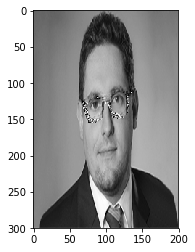

In [503]:
%matplotlib inline
plt.imshow(img1,cmap='gray')

In [478]:
cv2.imwrite('check_irls_5_6.png',img1)

True

(104, 116)

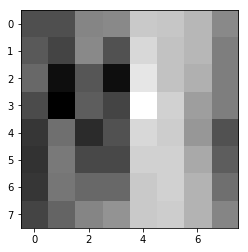

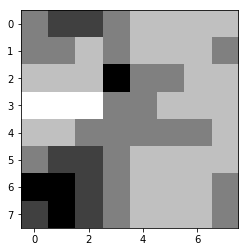